In [ ]:
import lob

import numpy as np, pandas as pd
import matplotlib as mpl, matplotlib.pyplot as plt
import tqdm
import importlib
importlib.reload(lob)

100%|██████████| 500/500 [00:07<00:00, 69.54it/s]


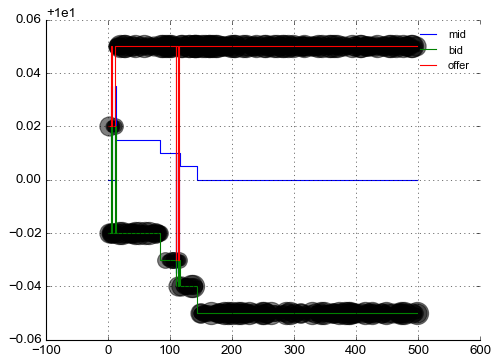

           bids  offers
10.11       0.0  5200.0
10.10       0.0  5600.0
10.09       0.0  7600.0
10.06       0.0  9900.0
10.02       0.0     0.0
9.98        0.0     0.0
9.97        0.0     0.0
9.96        0.0     0.0
9.95   139400.0     0.0
9.94     6600.0     0.0
9.91     7000.0     0.0
9.90     4700.0     0.0


In [13]:
importlib.reload(lob)

market = lob.Market(randomize_environment=True)

books = {}
mids = []
bids = []
offers = []
trades = {}
iters = 500
for i in tqdm.tqdm(range(iters)):
    trade = market.lob.send(market._random_order(marketable=True))
    market.lob.send(market._random_order(marketable=False))

    book = market.lob.get_level_2_book()
    books[i] = book
    mids.append(market.lob.get_mid())
    bids.append(market.lob.get_bid())
    offers.append(market.lob.get_offer())
    trades[i] = trade

    # Must evolve the market to step the fair value process
    market.evolve()
    
books = pd.concat(books)
books = books.stack().unstack(1).unstack(1).dropna(axis=1)

mids, bids, offers = pd.Series({i: mids[i] for i in range(iters)}), pd.Series({i: bids[i] for i in range(iters)}), pd.Series({i: offers[i] for i in range(iters)})

plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

ax.plot(mids, label='mid', ds='steps-post')
ax.plot(bids, label='bid', ds='steps-post')
ax.plot(offers, label='offer', ds='steps-post')

for t in trades:
    for price, qty in trades[t]:
        ax.scatter(x=t, y=price, s=qty, c='k', alpha=0.5)

ax.legend(frameon=False, fontsize='small')

# print(trades)
plt.show()

print(books.iloc[-1].unstack().T.sort_index(ascending=False))


In [14]:
market.fv_process.fv

-12.516584876602835